In [1]:
library(Seurat)
library(clustree)
library(dittoSeq)
library(dplyr)

Attaching SeuratObject

Loading required package: ggraph

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
maindir="/Users/rejsmont/Google Drive/My Drive/Projects/RDN-WDP/sharing/"
colors = dittoColors()
options(warn=-1)

In [3]:
counts = read.delim(file.path(maindir, "export", "aerts_counts.csv"), sep=",", header=TRUE, row.names=1, check.names=FALSE)

In [4]:
counts = read.delim(file.path(maindir, "export", "aerts_counts.csv"), sep=",", header=TRUE, row.names=1, check.names=FALSE)
counts = t(counts)
obj = CreateSeuratObject(counts=counts, project="Eye Disc", min.cells=1, min.features=1)

In [5]:
cells = read.delim(file.path(maindir, "export", "aerts_cells.csv"), sep=",", header=TRUE, row.names=1, check.names=FALSE)
obj@meta.data$barcodes = cells[,1]
obj@meta.data$rep = unlist(lapply(strsplit(cells[,1],"-"), function(x)x[2]))

In [6]:
clusters = read.delim(file.path(maindir, "export", "aerts_clusters.csv"), sep=",", header=TRUE, row.names=1, check.names=FALSE)
obj@meta.data$image_clusters = clusters[,1]

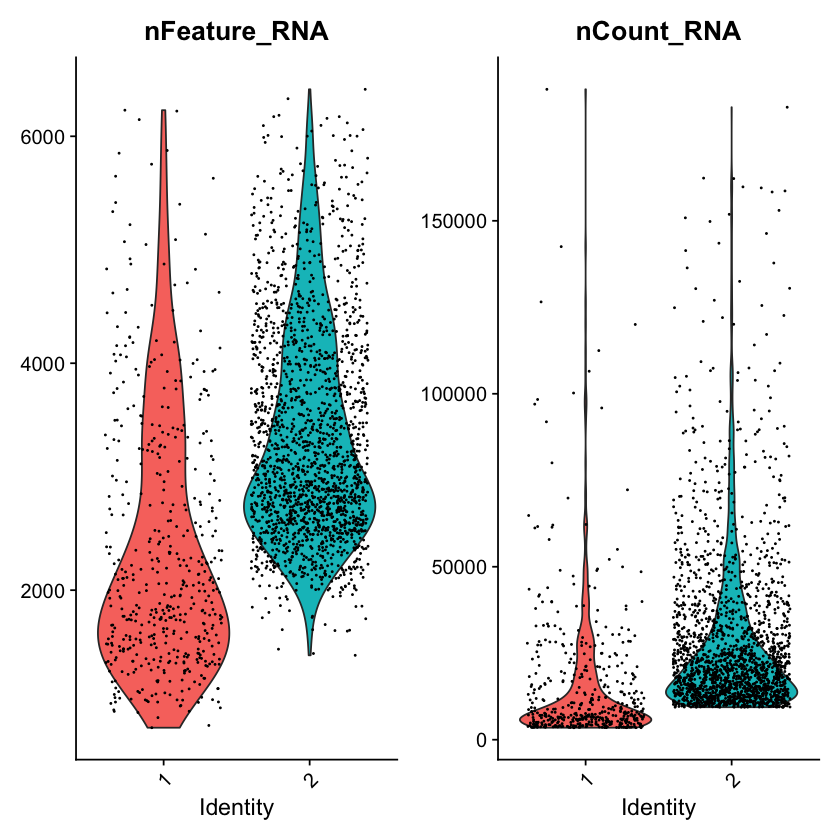

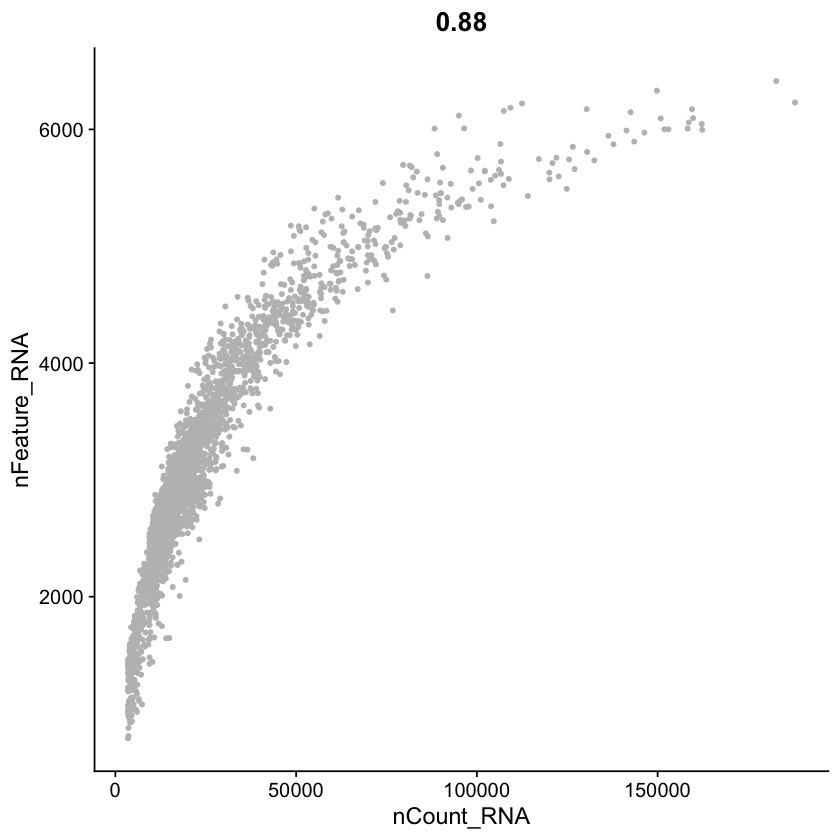

In [7]:
clustersname = read.delim(file.path(maindir, "export", "clusters.csv"), sep=",", header=TRUE, row.names=1, check.names=FALSE)
obj@meta.data$image_clusters_name = obj@meta.data$image_clusters
obj@meta.data$image_clusters_name[obj@meta.data$image_clusters==1] <- clustersname[1,1]
obj@meta.data$image_clusters_name[obj@meta.data$image_clusters==2] <- clustersname[2,1]
obj@meta.data$image_clusters_name[obj@meta.data$image_clusters==3] <- clustersname[3,1]
obj@meta.data$image_clusters_name[obj@meta.data$image_clusters==4] <- clustersname[4,1]
obj@meta.data$image_clusters_name[obj@meta.data$image_clusters==5] <- clustersname[5,1]
obj@meta.data$image_clusters_name[obj@meta.data$image_clusters==6] <- clustersname[6,1]
obj@meta.data$image_clusters_name[obj@meta.data$image_clusters==7] <- clustersname[7,1]

VlnPlot(obj, features = c("nFeature_RNA", "nCount_RNA"), group.by="rep")
FeatureScatter(obj, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", cols="grey") + NoLegend()

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 10329 by 2382

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2382 cells



  |======================================================================| 100%


Found 129 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 10329 genes



  |======================================================================| 100%


Computing corrected count matrix for 10329 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 23.17354 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

12:01:43 UMAP embedding parameters a = 0.9922 b = 1.112

12:01:43 Read 2382 rows and found 30 numeric columns

12:01:43 Using Annoy for neighbor search, n_neighbors = 30

12:01:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:01:44 Writing NN index file to temp file /var/folders/gf/zw7zwg9x2712krzvcpgml2tc0000gq/T//Rtmpj435Me/file847b798791ab

12:01:44 Searching Annoy index using 1 thread, search_k = 3000

12:01:44 Annoy recall = 100%

12:01:45 Commencing smooth kNN distance calibration using 1 thread

12:01:46 Initializing from normalized Laplacian + noise

12:0

orig.ident          nCount_RNA        nFeature_RNA            barcodes 
          "numeric"           "numeric"           "integer"         "character" 
                rep      image_clusters image_clusters_name          nCount_SCT 
        "character"           "integer"         "character"           "numeric" 
       nFeature_SCT       SCT_snn_res.0     seurat_clusters     SCT_snn_res.0.1 
          "integer"           "numeric"           "numeric"           "numeric" 
    SCT_snn_res.0.2     SCT_snn_res.0.3     SCT_snn_res.0.4     SCT_snn_res.0.5 
          "numeric"           "numeric"           "numeric"           "numeric" 
    SCT_snn_res.0.6     SCT_snn_res.0.7     SCT_snn_res.0.8     SCT_snn_res.0.9 
          "numeric"           "numeric"           "numeric"           "numeric" 
      SCT_snn_res.1 
          "numeric"

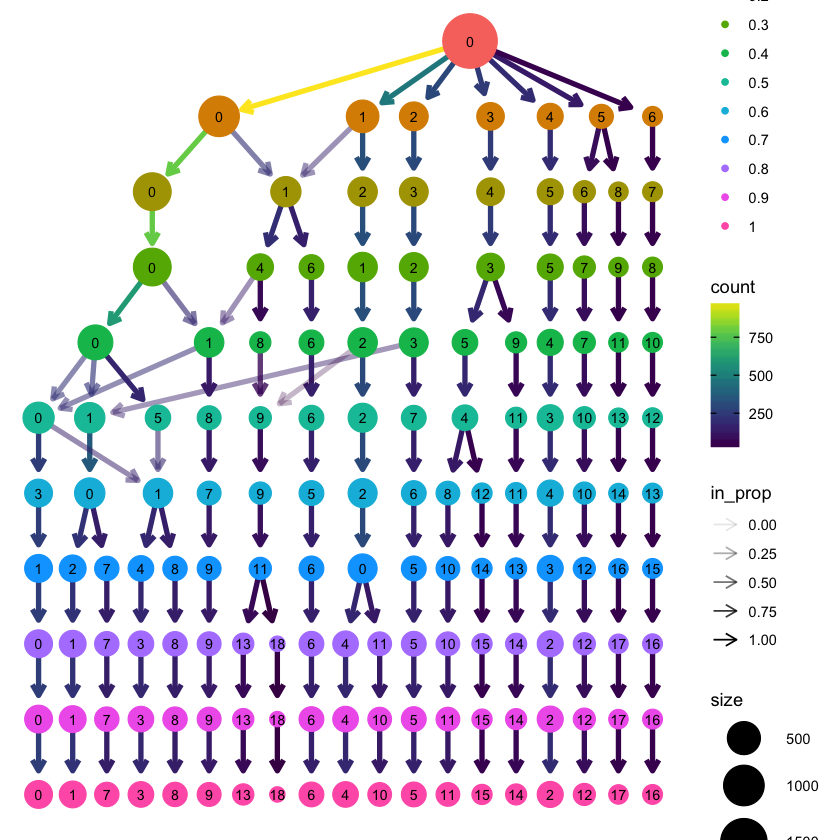

In [37]:
res = c(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
obj <- SCTransform(obj)

obj <- RunPCA(obj, verbose = FALSE)

obj <- FindNeighbors(obj, dims = 1:30, verbose = FALSE)
for(i in 1:length(res)){
  obj <- FindClusters(obj, verbose = FALSE,resolution = res[i])

}
obj <- RunUMAP(obj, dims = 1:30, verbose = FALSE,n.components = 3L)

colors = dittoColors()

obj@meta.data[]<- lapply(obj@meta.data, function(x) {
     if(is.factor(x)) as.numeric(as.character(x)) else x
 })
sapply(obj@meta.data, class)

clustree(obj, prefix = "SCT_snn_res.")

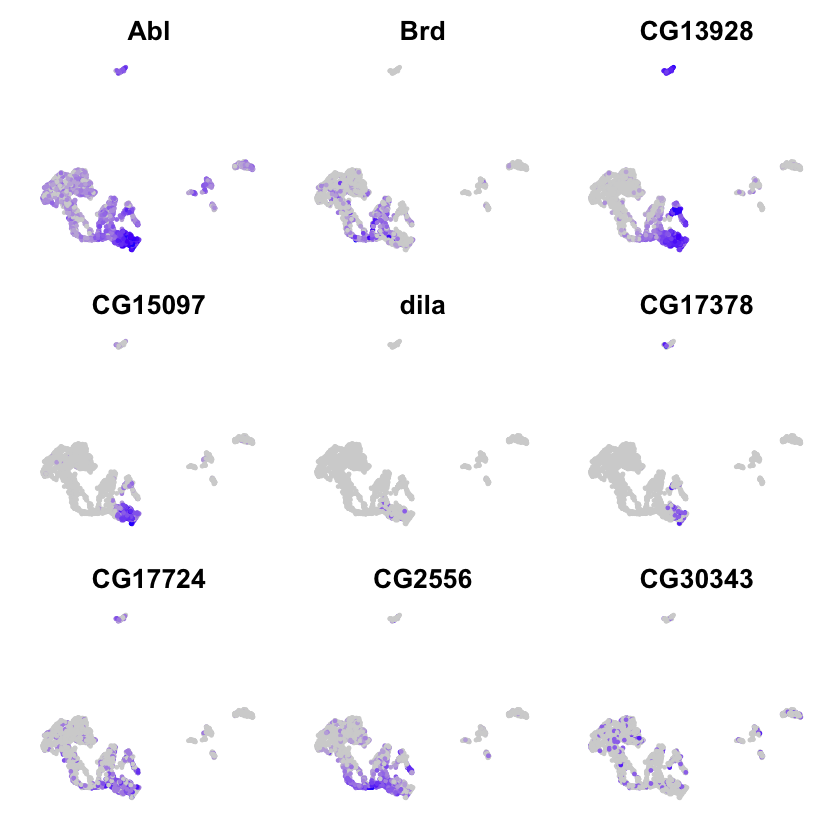

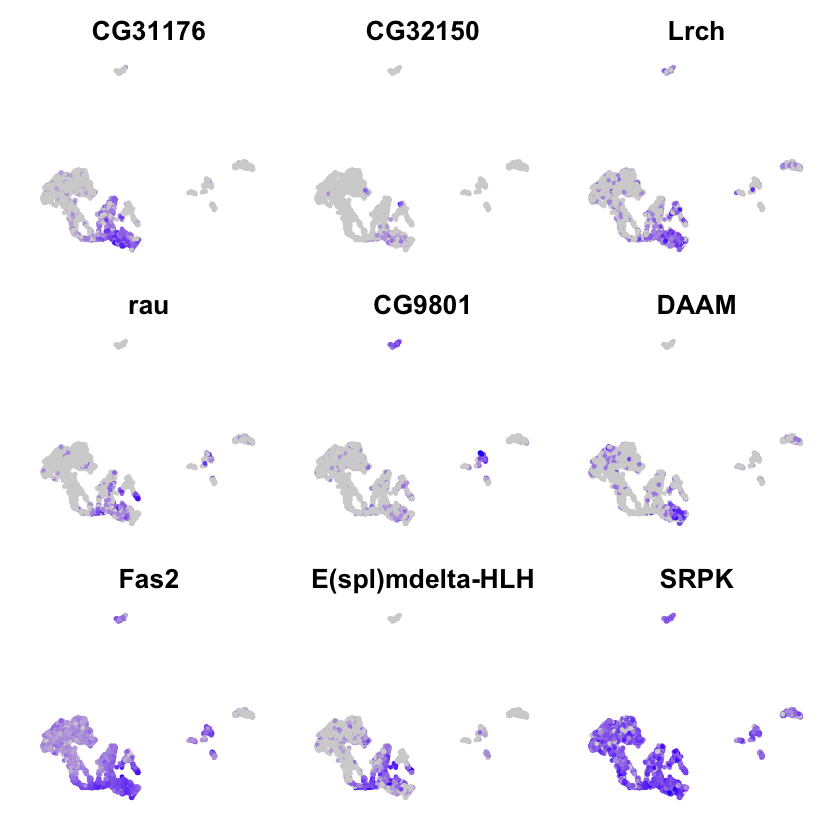

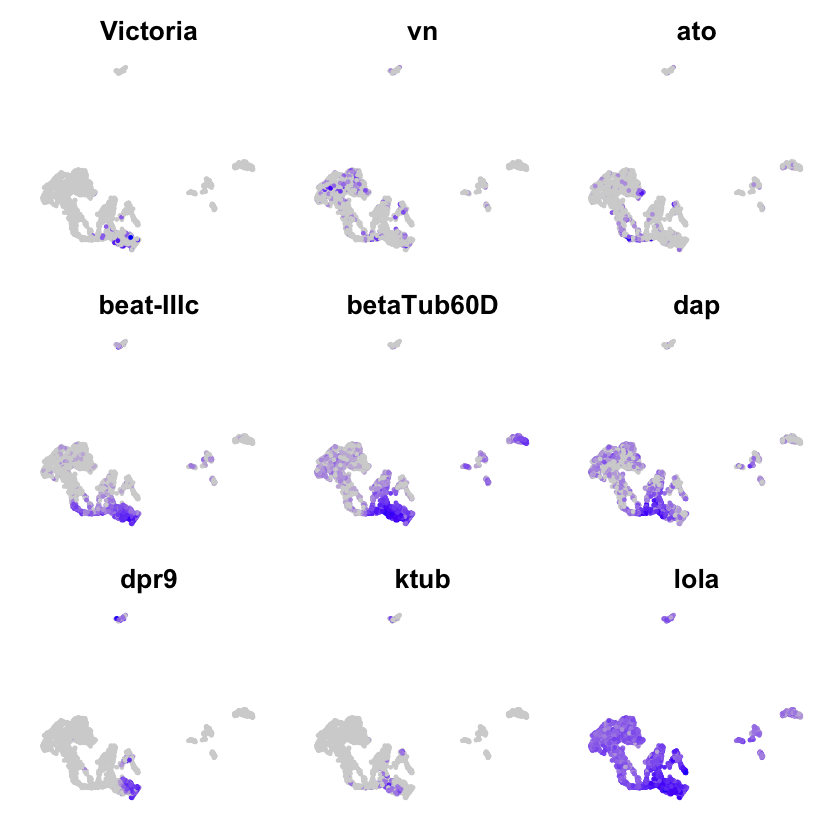

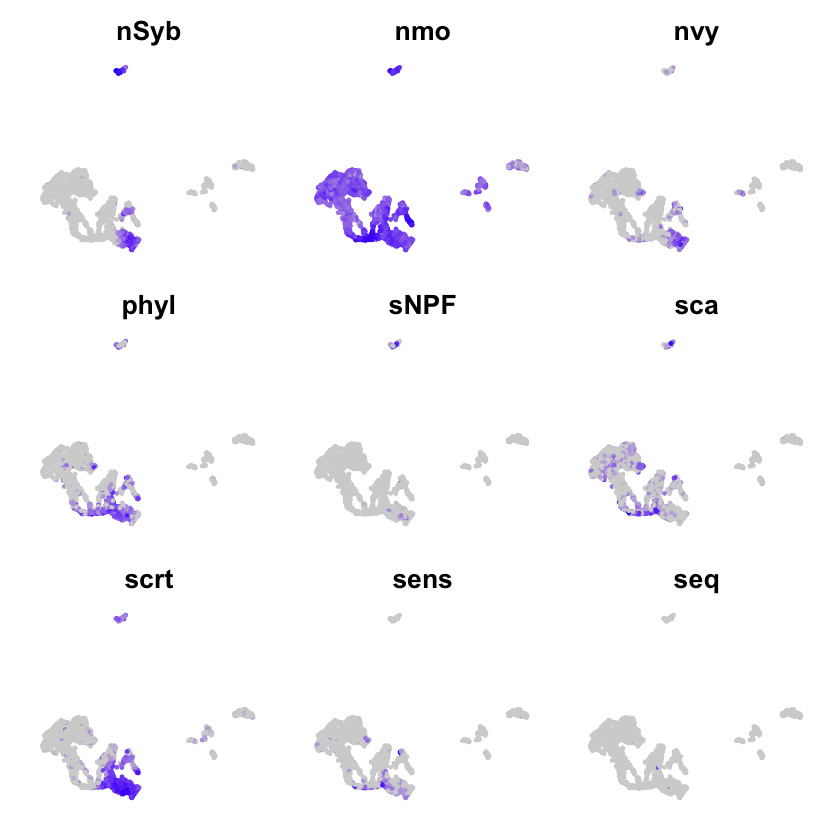

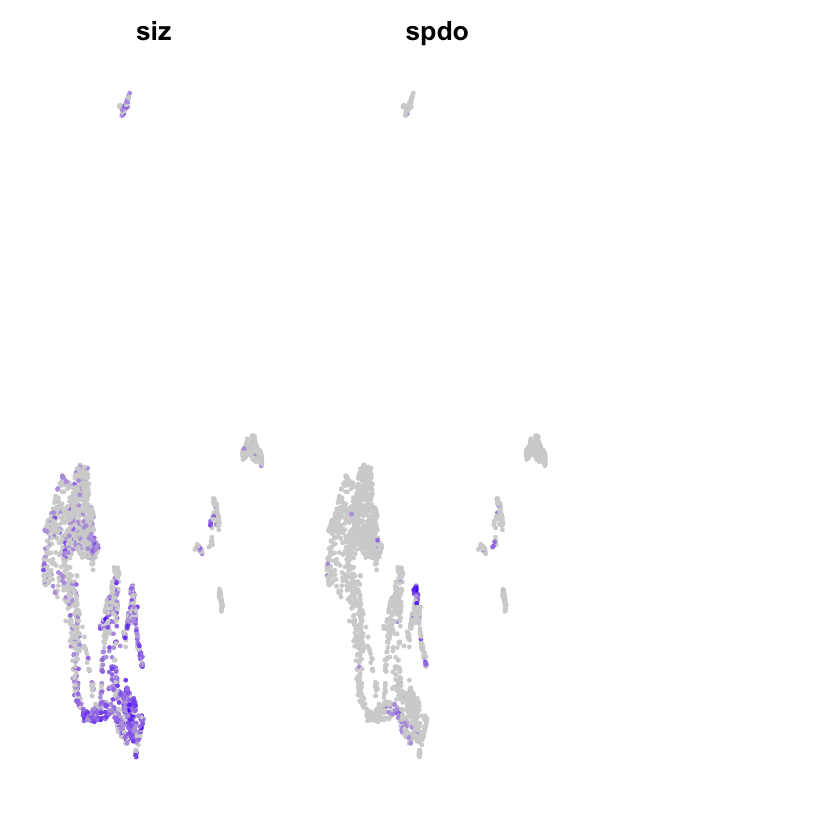

In [9]:
genes = read.delim(file.path(maindir, "export", "genes.csv"), sep=",", header=TRUE, row.names=1, check.names=FALSE)
FeaturePlot(obj, features=genes[1:9,1], ncol=3) & NoLegend() &NoAxes() 
FeaturePlot(obj, features=genes[10:18,1], ncol=3) & NoLegend() &NoAxes()
FeaturePlot(obj, features=genes[19:27,1], ncol=3) & NoLegend() &NoAxes()
FeaturePlot(obj, features=genes[28:36,1], ncol=3) & NoLegend() &NoAxes()
FeaturePlot(obj, features=genes[37:39,1], ncol=3) & NoLegend() &NoAxes()

save(obj, file="EyeDisc_Seurat.RData")

### Image clusters

Calculating cluster MF ato(+)

Calculating cluster non-R8

Calculating cluster posterior

Calculating cluster peripodial

Calculating cluster anterior

Calculating cluster MF ato(+++)

Calculating cluster R8 ato(+)



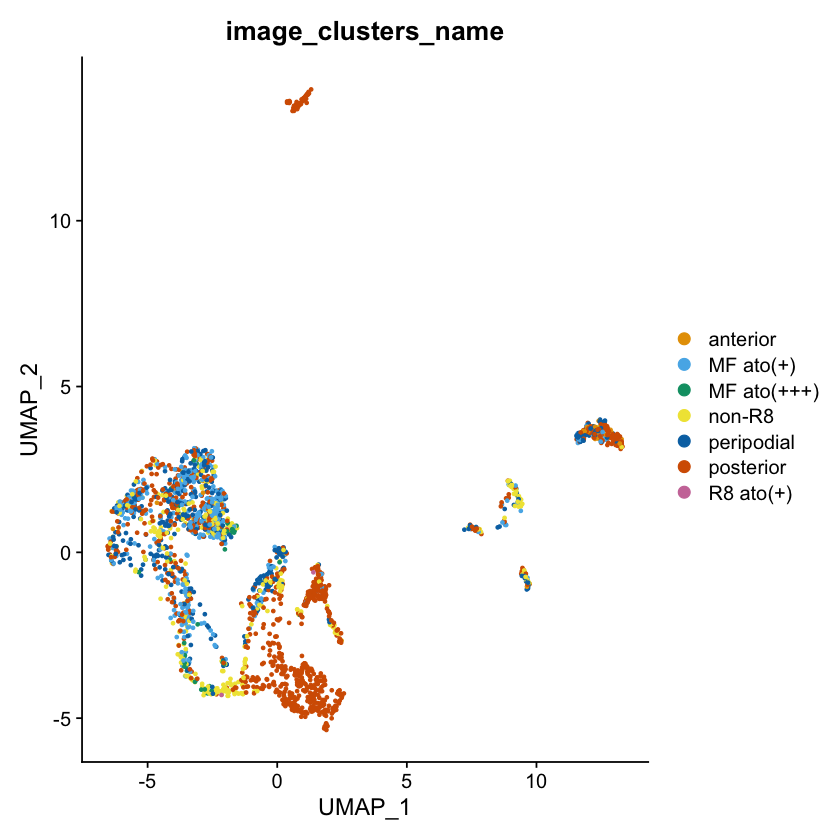

Centering and scaling data matrix



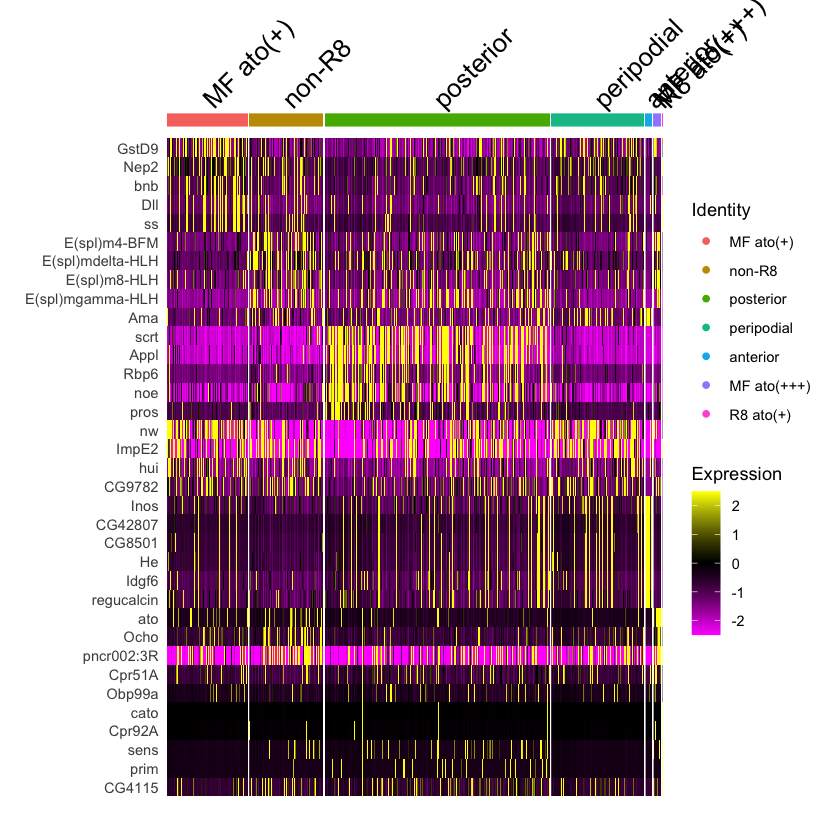

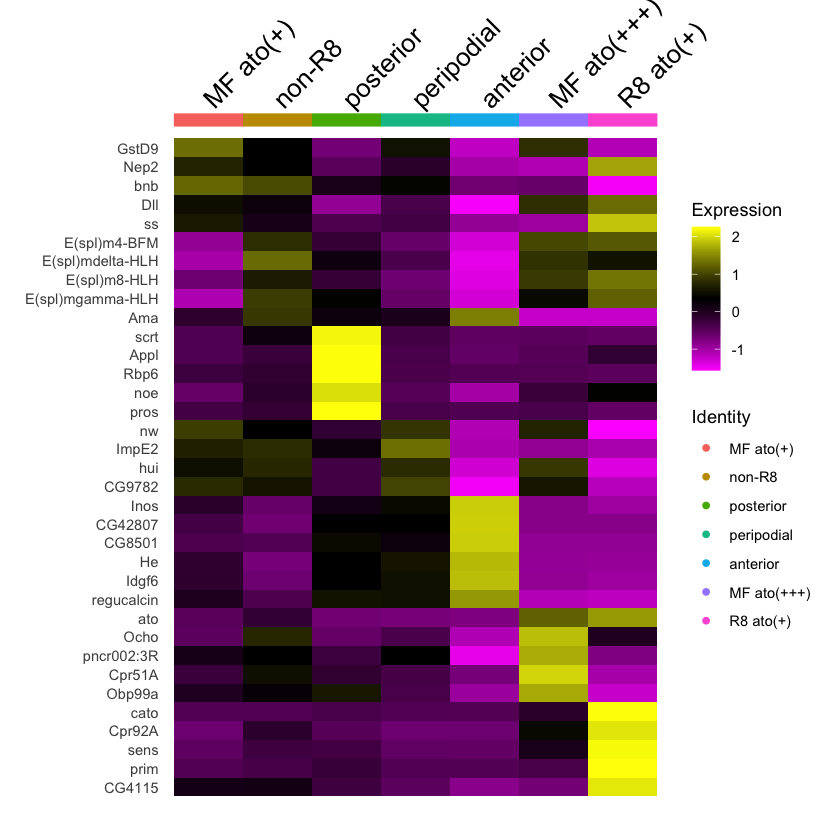

In [10]:
DimPlot(obj, reduction = "umap", group.by = "image_clusters_name", label=F, cols=colors)

Idents(obj) = "image_clusters_name"
res_image = FindAllMarkers(obj, logfc.threshold = 0.25,min.pct = 0.25)
write.table(res_image, file="anaDiff_imageClusters.txt", sep="\t", quote=FALSE, row.names=FALSE)
top5<-res_image %>% group_by(cluster) %>% top_n(5, avg_log2FC)
DoHeatmap(object = obj, features = top5$gene, label = TRUE, raster=FALSE)

image_ave = AverageExpression(obj, return.seurat = TRUE)
DoHeatmap(object = image_ave, features = top5$gene, raster=FALSE, draw.lines=FALSE)

### Seurat clusters 0.1

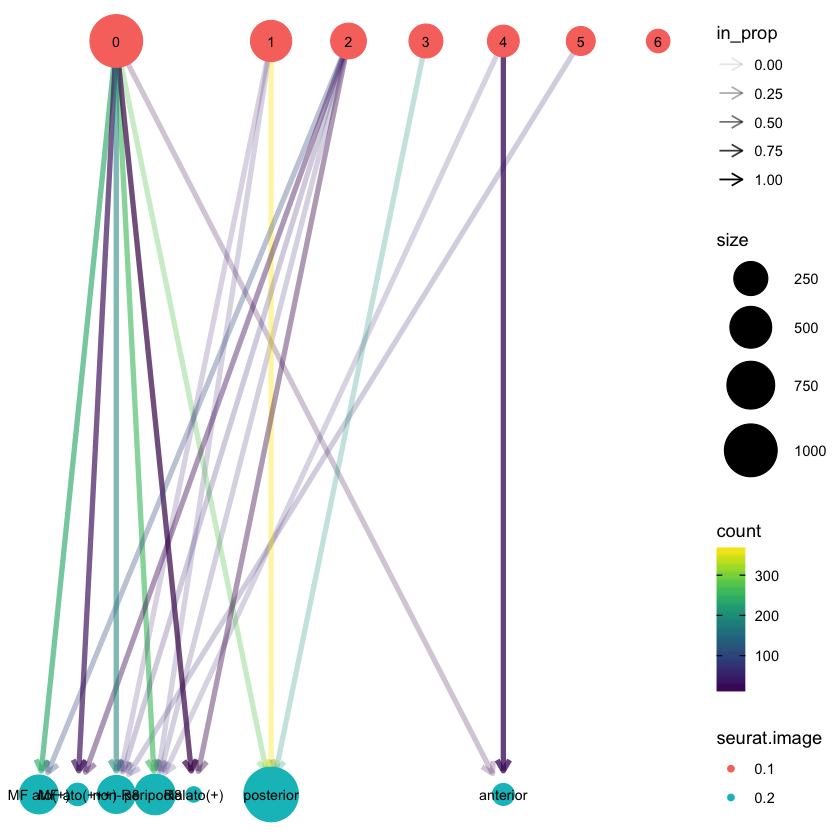

Calculating cluster 1

Calculating cluster 3

Calculating cluster 0

Calculating cluster 5

Calculating cluster 4

Calculating cluster 2

Calculating cluster 6



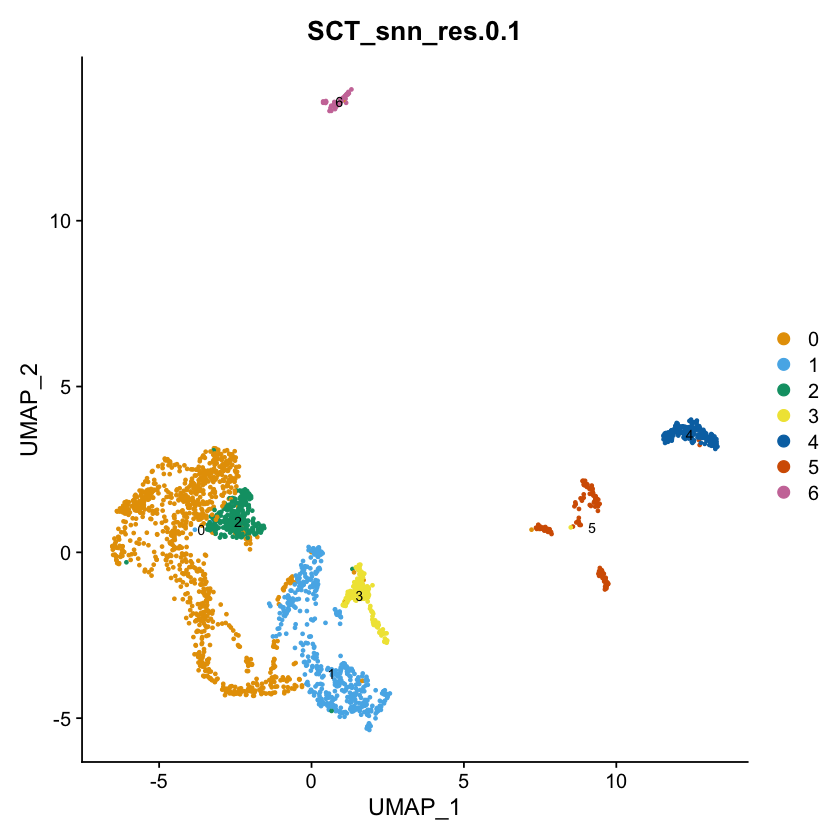

Centering and scaling data matrix



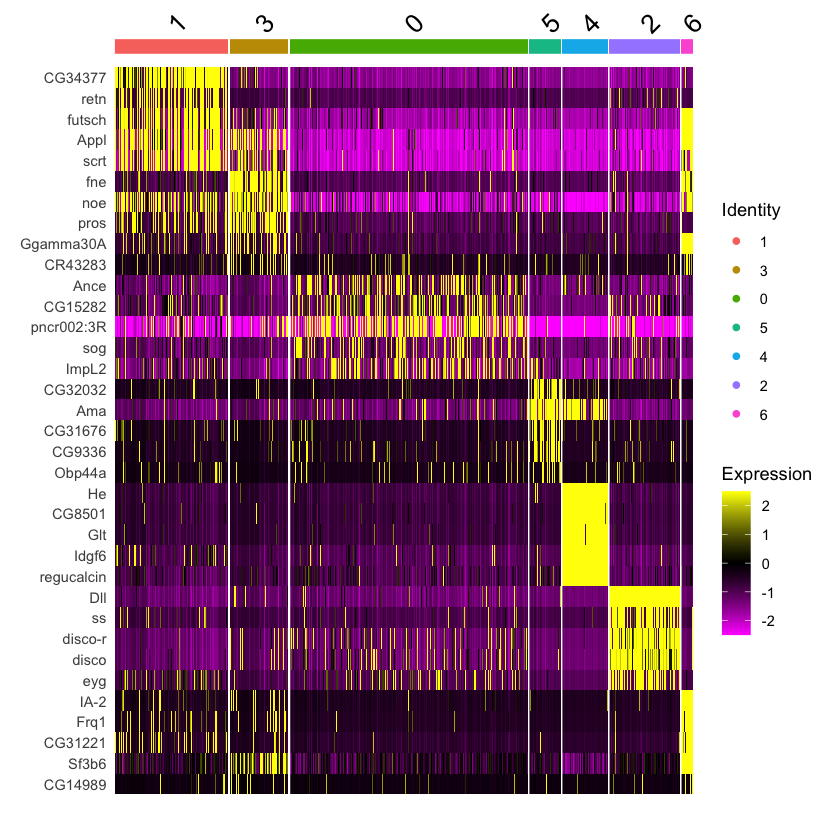

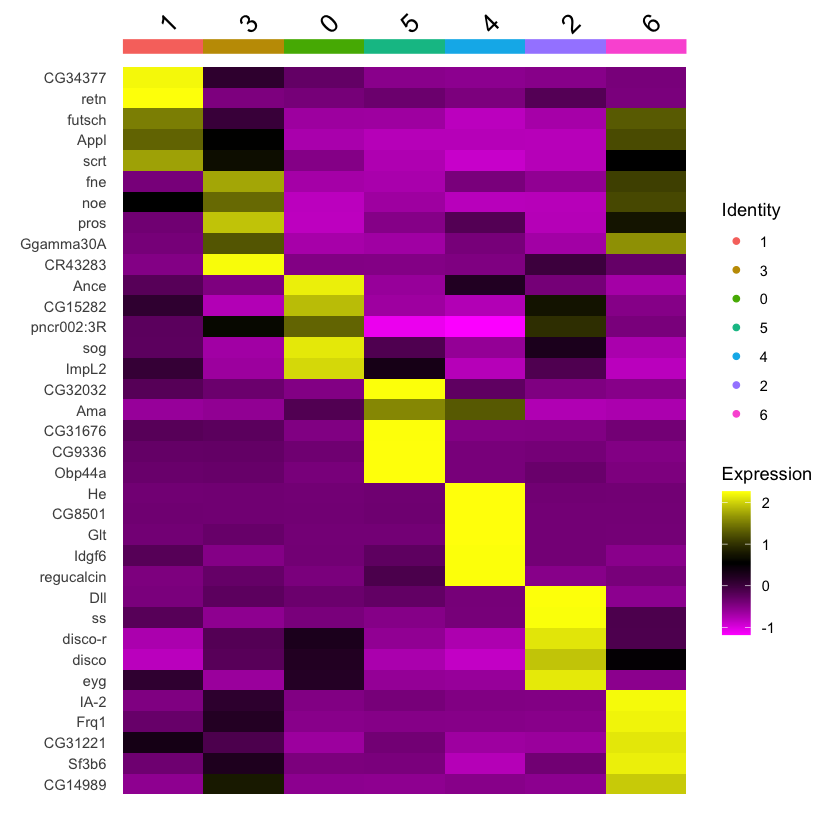

In [39]:
df_comp = data.frame(obj@meta.data$SCT_snn_res.0.1, obj@meta.data$image_clusters_name)
colnames(df_comp) = c("seurat.image.1", "seurat.image.2")
clustree(df_comp, prefix="seurat.image")

DimPlot(obj, reduction = "umap", group.by = "SCT_snn_res.0.1", label=T, label.size = 3, cols=colors)

Idents(obj) = "SCT_snn_res.0.1"
res_seurat = FindAllMarkers(obj, logfc.threshold = 0.25, min.pct = 0.25)
write.table(res_seurat, file="anaDiff_res0.1_seuratClusters.txt", sep="\t", quote=FALSE, row.names=FALSE)
top5<-res_seurat %>% group_by(cluster) %>% top_n(5, avg_log2FC)
DoHeatmap(object = obj, features = top5$gene, label = TRUE, raster=FALSE)

seurat_ave = AverageExpression(obj, return.seurat = TRUE)
DoHeatmap(object = seurat_ave, features = top5$gene, raster=FALSE, draw.lines=FALSE)

In [40]:
top5

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,3.234072,0.949,0.108,0.000000e+00,1,CG34377
8.654174e-200,3.253356,0.578,0.044,8.938897e-196,1,retn
2.263270e-184,3.492138,0.838,0.243,2.337731e-180,1,futsch
1.498079e-165,3.350121,0.829,0.269,1.547365e-161,1,Appl
5.244946e-158,3.646038,0.806,0.270,5.417504e-154,1,scrt
1.268891e-180,4.346413,0.833,0.127,1.310638e-176,3,fne
1.340582e-84,3.490467,1.000,0.833,1.384687e-80,3,noe
1.071048e-69,4.862028,0.610,0.184,1.106286e-65,3,pros
1.681896e-52,3.172655,0.451,0.118,1.737230e-48,3,Ggamma30A


### Seurat clusters 0.4

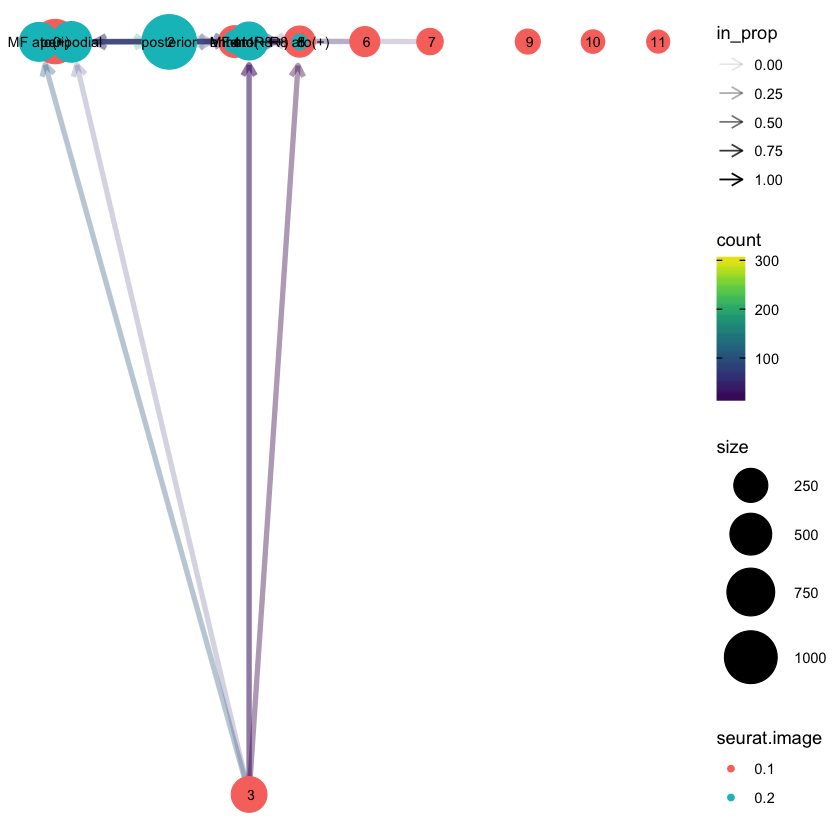

Calculating cluster 6

Calculating cluster 5

Calculating cluster 2

Calculating cluster 0

Calculating cluster 8

Calculating cluster 1

Calculating cluster 7

Calculating cluster 9

Calculating cluster 11

Calculating cluster 4

Calculating cluster 3

Calculating cluster 10



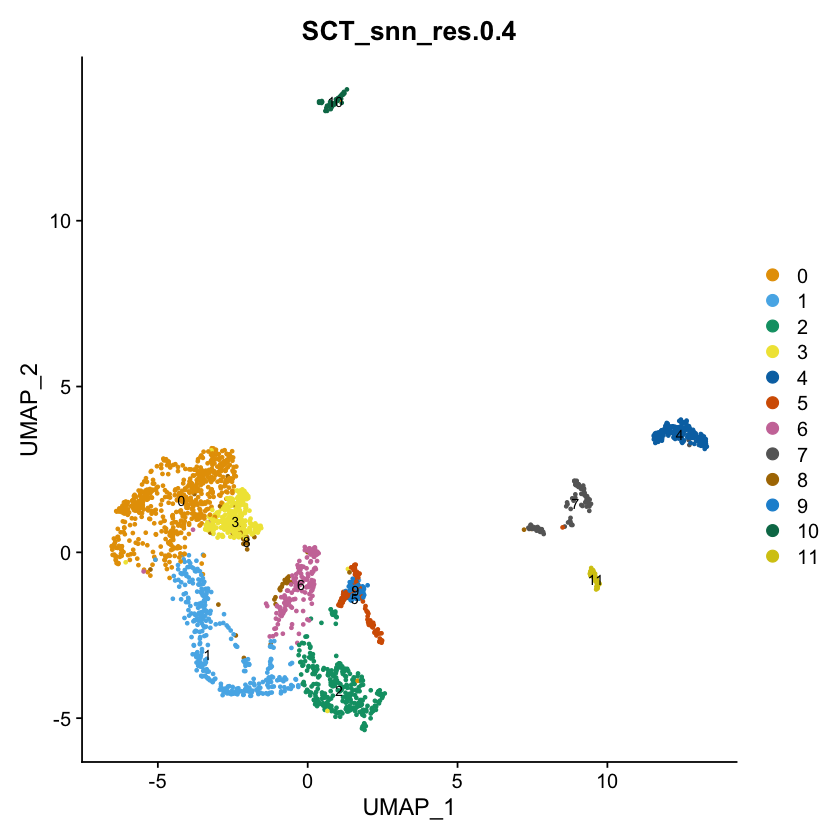

Centering and scaling data matrix



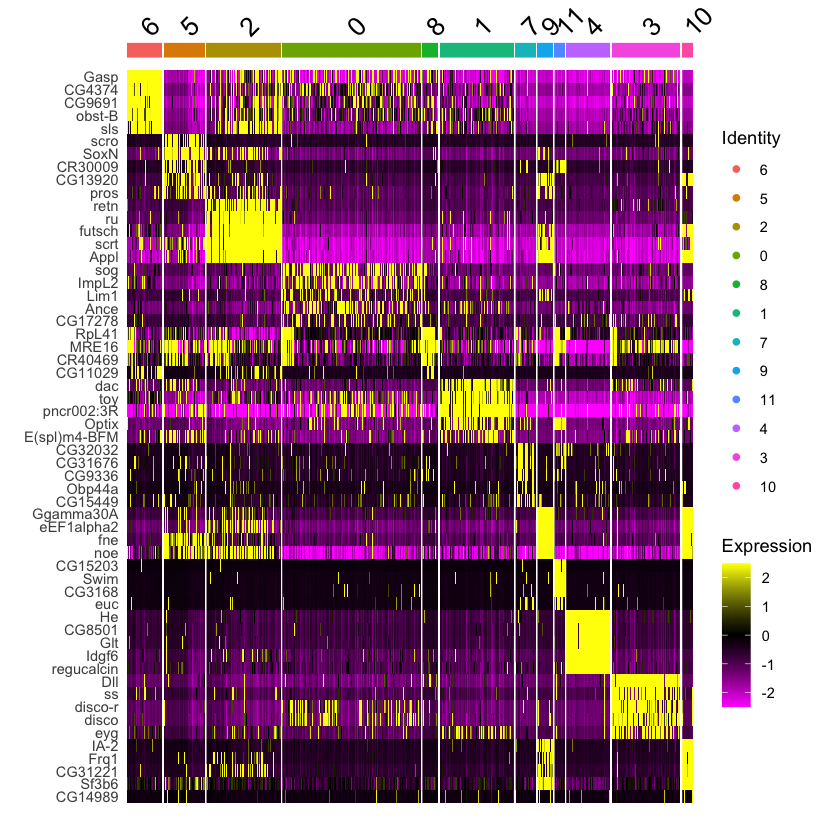

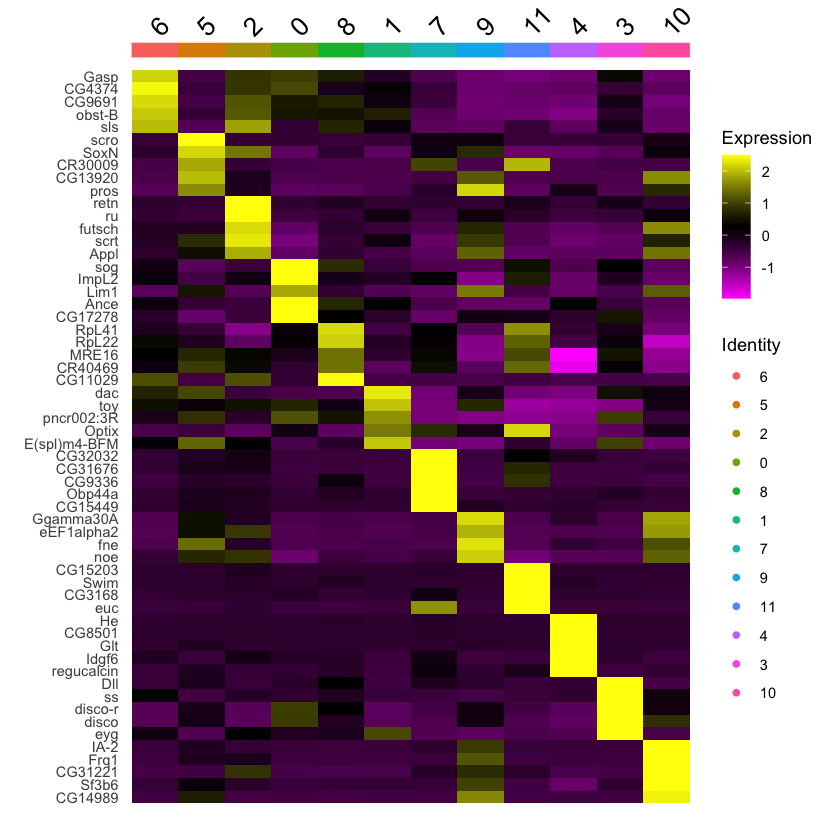

In [12]:
df_comp = data.frame(obj@meta.data$SCT_snn_res.0.4, obj@meta.data$image_clusters_name)
colnames(df_comp) = c("seurat.image.1", "seurat.image.2")
clustree(df_comp, prefix="seurat.image")

DimPlot(obj, reduction = "umap",group.by = "SCT_snn_res.0.4",label=T,label.size = 3,cols=colors)

Idents(obj) = "SCT_snn_res.0.4"
res_seurat = FindAllMarkers(obj, logfc.threshold = 0.25,min.pct = 0.25)
write.table(res_seurat, file="anaDiff_res0.4_seuratClusters.txt", sep="\t", quote=FALSE, row.names=FALSE)
top5<-res_seurat %>% group_by(cluster) %>% top_n(5, avg_log2FC)
DoHeatmap(object = obj, features = top5$gene, label = TRUE, raster=FALSE)

seurat_ave = AverageExpression(obj, return.seurat = TRUE)
DoHeatmap(object = seurat_ave, features = top5$gene, raster=FALSE, draw.lines=FALSE)

### Seurat clusters 0.7

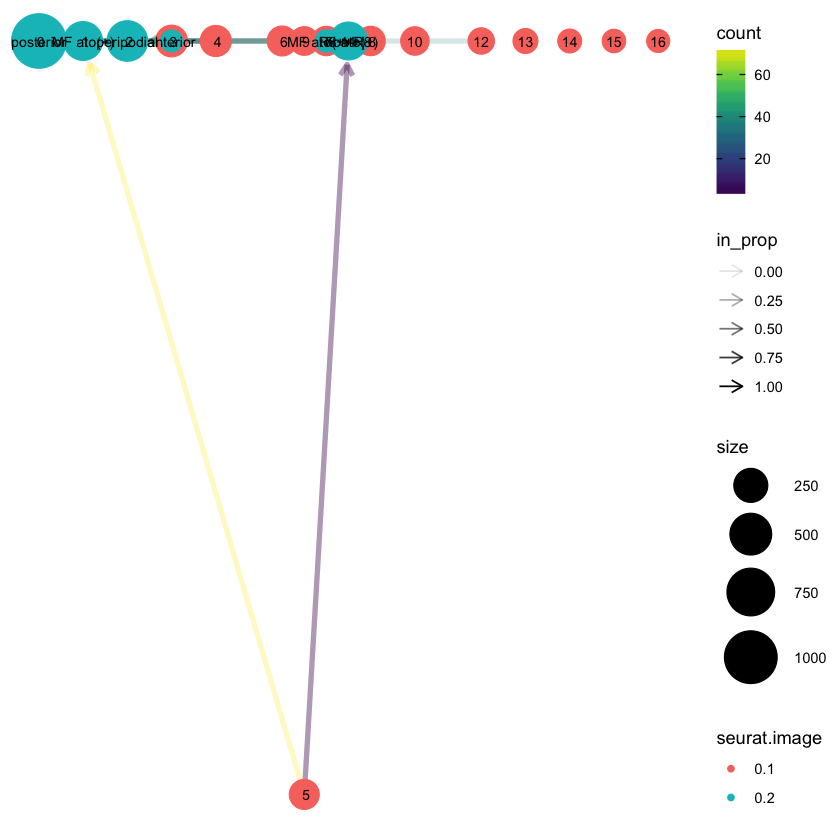

Calculating cluster 6

Calculating cluster 14

Calculating cluster 0

Calculating cluster 1

Calculating cluster 11

Calculating cluster 10

Calculating cluster 12

Calculating cluster 4

Calculating cluster 13

Calculating cluster 16

Calculating cluster 2

Calculating cluster 3

Calculating cluster 5

Calculating cluster 9

Calculating cluster 7

Calculating cluster 8

Calculating cluster 15



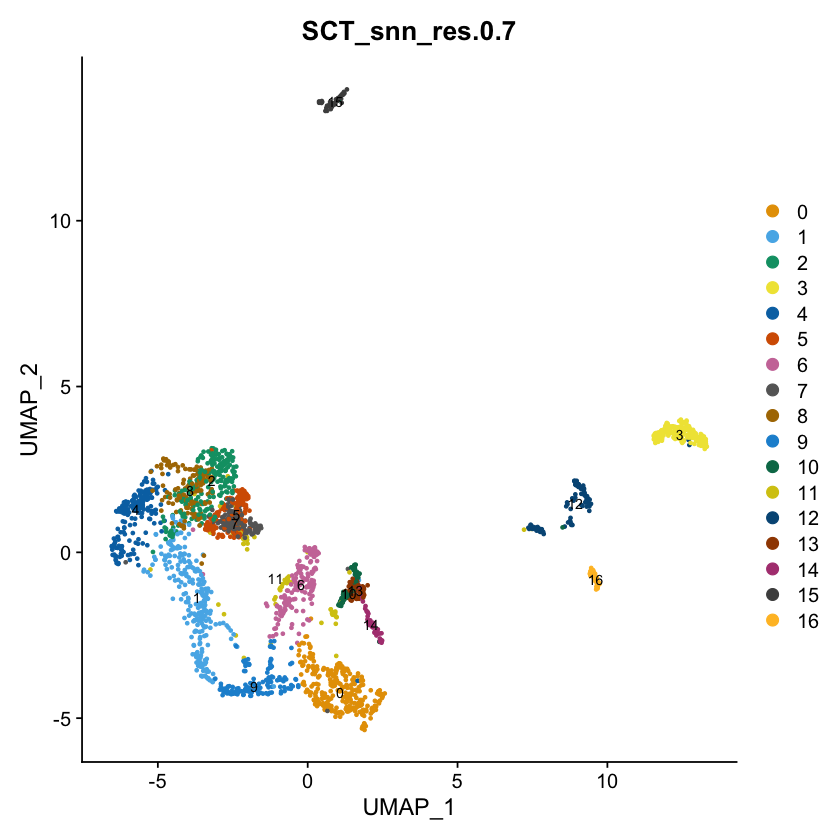

Centering and scaling data matrix



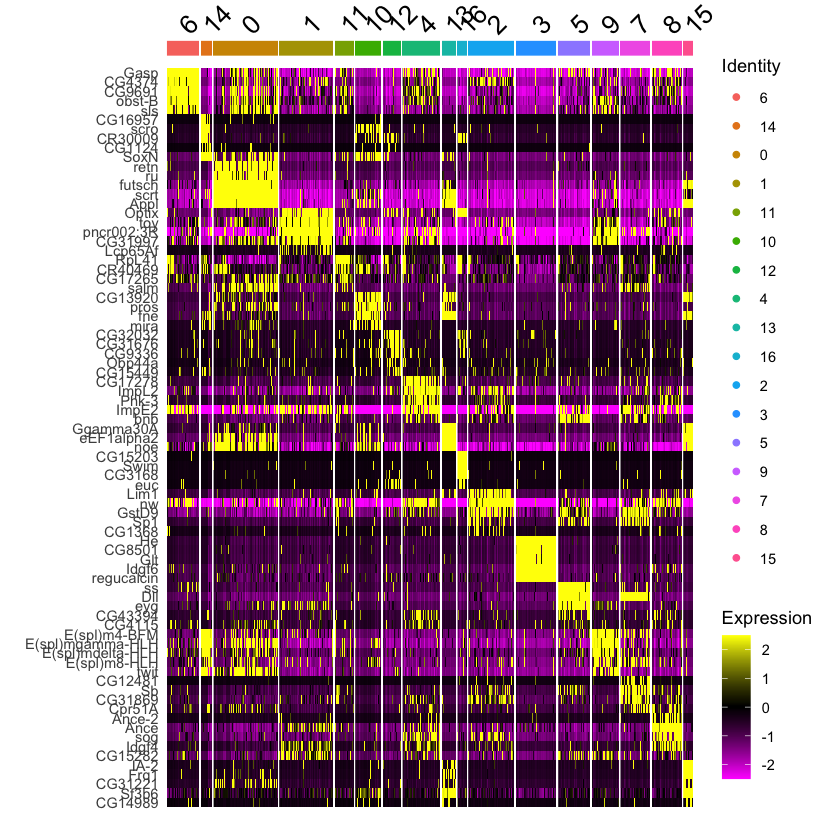

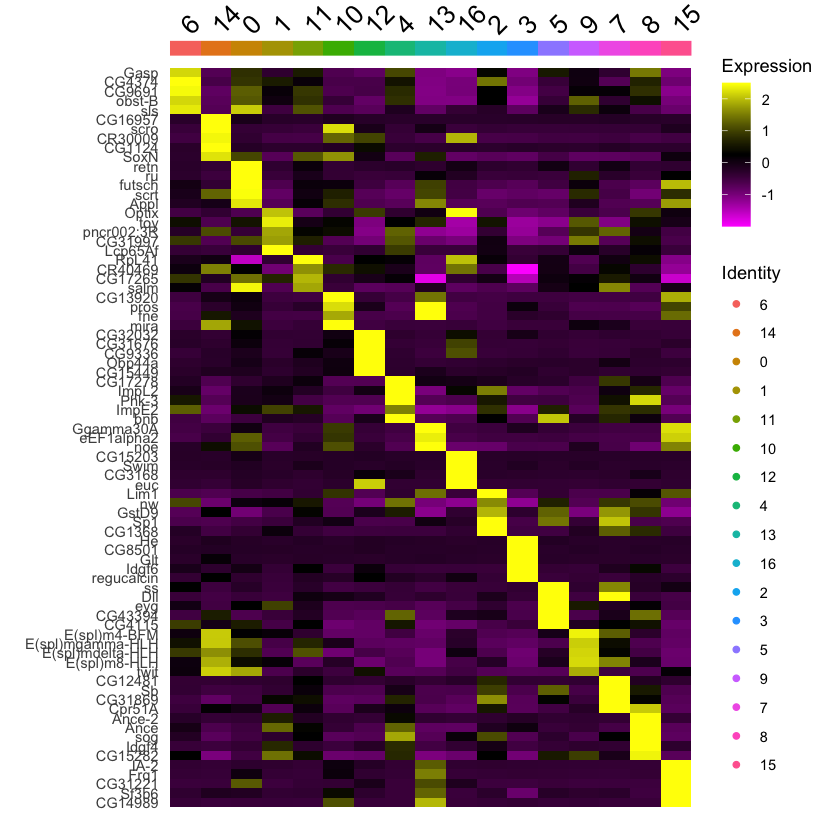

In [13]:
df_comp = data.frame(obj@meta.data$SCT_snn_res.0.7, obj@meta.data$image_clusters_name)
colnames(df_comp) = c("seurat.image.1", "seurat.image.2")
clustree(df_comp, prefix="seurat.image")

DimPlot(obj, reduction = "umap",group.by = "SCT_snn_res.0.7",label=T,label.size = 3,cols=colors)

Idents(obj) = "SCT_snn_res.0.7"
res_seurat = FindAllMarkers(obj, logfc.threshold = 0.25,min.pct = 0.25)
write.table(res_seurat, file="anaDiff_res0.7_seuratClusters.txt", sep="\t", quote=FALSE, row.names=FALSE)
top5<-res_seurat %>% group_by(cluster) %>% top_n(5, avg_log2FC)
DoHeatmap(object = obj, features = top5$gene, label = TRUE, raster=FALSE)

seurat_ave = AverageExpression(obj, return.seurat = TRUE)
DoHeatmap(object = seurat_ave, features = top5$gene, raster=FALSE, draw.lines=FALSE)

Calculating cluster MF ato(+)

Calculating cluster non-R8

Calculating cluster posterior

Calculating cluster peripodial

Calculating cluster anterior

Calculating cluster MF ato(+++)

Calculating cluster R8 ato(+)

Centering and scaling data matrix



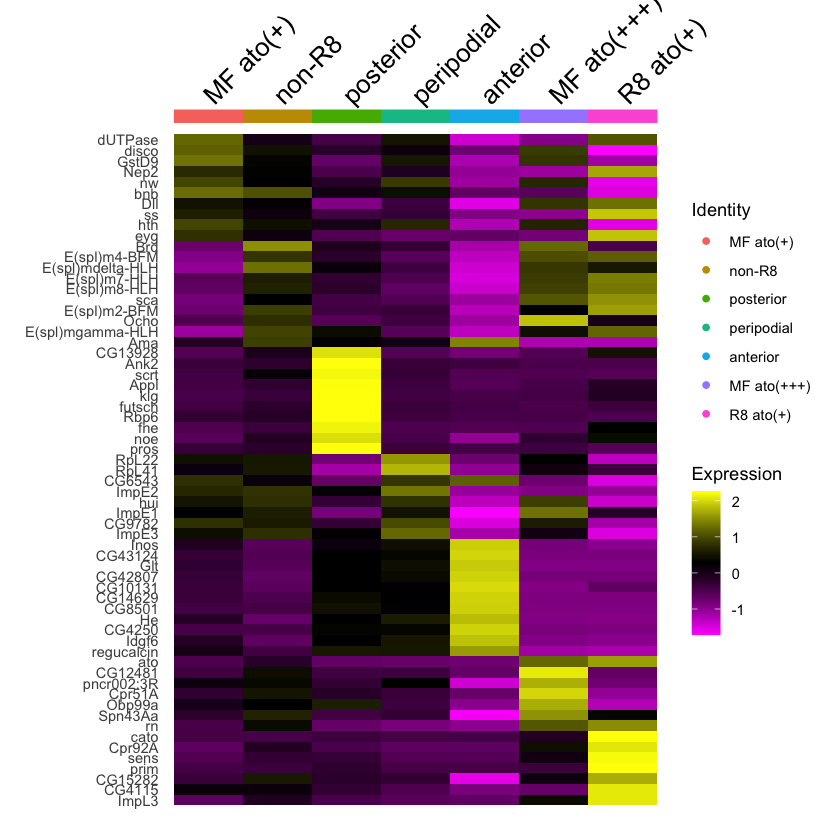

In [23]:
Idents(obj) = "image_clusters_name"
res_image = FindAllMarkers(obj, logfc.threshold = 0.25,min.pct = 0.25)
write.table(res_image, file="anaDiff_imageClusters.txt", sep="\t", quote=FALSE, row.names=FALSE)
top10<-res_image %>% group_by(cluster) %>% top_n(10, avg_log2FC)
image_ave = AverageExpression(obj, return.seurat = TRUE)
DoHeatmap(object = image_ave, features = top10$gene, raster=FALSE, draw.lines=FALSE, slot='scale.data')

In [36]:
obj@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,barcodes,rep,image_clusters,image_clusters_name,nCount_SCT,nFeature_SCT,SCT_snn_res.0,⋯,SCT_snn_res.0.1,SCT_snn_res.0.2,SCT_snn_res.0.3,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.0.9,SCT_snn_res.1
,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,NA,5908,1793,AACCGCGGTTGAGTTC-1,1,6,MF ato(+),17479,2419,0,⋯,1,1,6,6,6,5,6,6,6,6
1,NA,6605,1739,AACGTTGCAATCACAC-1,1,7,non-R8,17676,2322,0,⋯,3,4,3,5,4,12,14,15,15,15
2,NA,7888,2243,AACTCCCGTTCTGGTA-1,1,4,posterior,17097,2570,0,⋯,1,2,1,2,2,2,0,11,10,10
3,NA,7930,2283,AACTCCCTCCCAAGTA-1,1,4,posterior,17373,2629,0,⋯,1,2,1,2,2,2,0,11,10,10
4,NA,7126,1333,AACTCCCTCTGCGTAA-1,1,3,peripodial,18352,1943,0,⋯,0,0,0,0,0,3,1,0,0,0
5,NA,4597,933,AACTCTTGTCACTGGC-1,1,3,peripodial,18490,2155,0,⋯,0,1,4,8,9,9,11,13,13,13
6,NA,13802,2778,AACTGGTGTTACGGAG-1,1,3,peripodial,18110,2779,0,⋯,1,1,6,6,6,5,6,6,6,6
7,NA,27540,3538,AACTGGTTCCAATGGT-1,1,7,non-R8,19379,3451,0,⋯,0,0,0,1,0,3,1,0,0,0
8,NA,7042,1949,AACTTTCAGGATCGCA-1,1,3,peripodial,17738,2348,0,⋯,1,1,6,6,6,5,6,6,6,6
